# California House Prices Case

## Data Import and first Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# importing dataset
df = pd.read_csv("data/housing.csv")

# neglecting NAN 
df.dropna(inplace = True)

# Obtaining rooms / households
df["rooms_per_household"] = df['total_rooms']/df['households']

# proportion of bedrooms
df["bedrooms_per_rooms"] = df['total_bedrooms']/df['total_rooms']

# proportion of bedrooms
df["pop_per_household"] = df['population']/df['households']

__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20433 non-null  float64
 1   latitude             20433 non-null  float64
 2   housing_median_age   20433 non-null  float64
 3   total_rooms          20433 non-null  float64
 4   total_bedrooms       20433 non-null  float64
 5   population           20433 non-null  float64
 6   households           20433 non-null  float64
 7   median_income        20433 non-null  float64
 8   median_house_value   20433 non-null  float64
 9   ocean_proximity      20433 non-null  object 
 10  rooms_per_household  20433 non-null  float64
 11  bedrooms_per_rooms   20433 non-null  float64
 12  pop_per_household    20433 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.2+ MB


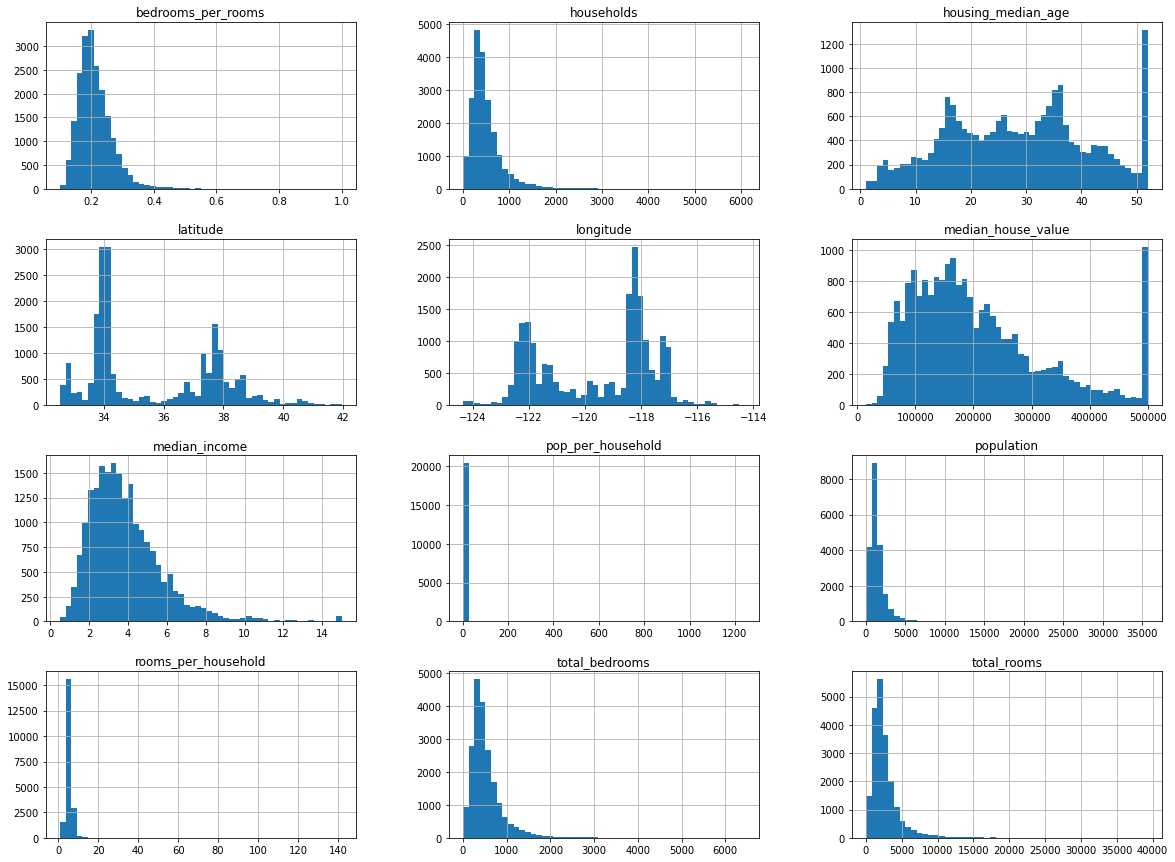

In [3]:
df.hist(bins=50, figsize=(20,15))
plt.savefig('results/features_histograms.png')
plt.show()

## Problem: Which Factors influence House Prices?

First of all, lets study how the features are correlated with the prices of house.

In [4]:
# correlation matrix
corr_M = df.corr()

# gsorting the column of prices and
corr_M['median_house_value'].sort_values(ascending = False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_rooms    -0.255880
Name: median_house_value, dtype: float64

### Insights

* **median_income** influences **median_house_value** that substantially. The correlation is positive, indicating that higher is the **median_income** more people can pay for the house

* **bedrooms_per_room** is negatively correlated to **median_income**. So, in the most expensive houses, the proportion of bedrooms related to total rooms is smaller

In [6]:
df[['median_income','median_house_value']].to_csv("income_house.csv",index=False)

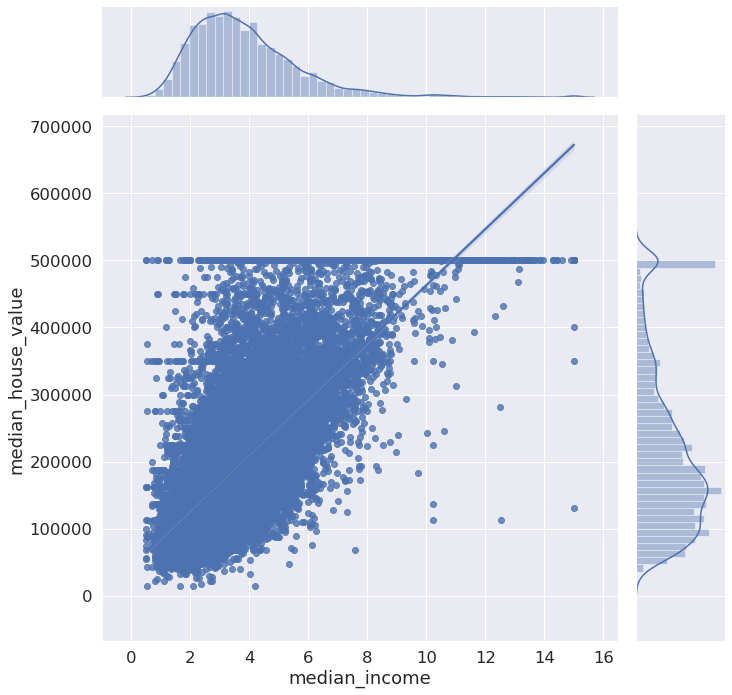

In [6]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, 
              x = "median_income", 
              y = "median_house_value", 
              kind = "reg", 
              height = 10
             )
plt.savefig('results/correlation_between_incoming_prices.png')
plt.show()

### So many houses with $ 500000

Is interesting the fact that there are so many house with prices close to 500 thousand dolars!

In [41]:
df[(490000 <= df['median_house_value']) & (df['median_house_value'] < 510000) ]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,pop_per_household,income_cat
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY,2.929412,0.313253,4.658824,Low
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY,2.436000,0.387521,5.396000,Low
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY,7.794393,0.134892,2.415888,Very High
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY,7.512097,0.127214,2.754032,Very High
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY,8.282548,0.126756,2.623269,Very High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN,6.958333,0.174983,2.666667,High
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN,9.890756,0.117247,3.487395,Very High
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN,7.236059,0.142692,2.553439,Very High
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN,9.873315,0.111657,3.177898,Very High


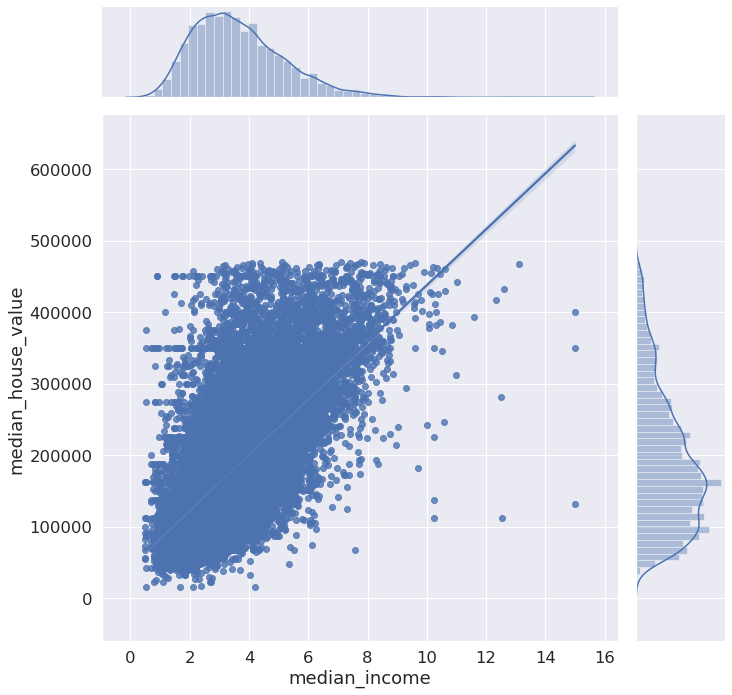

In [46]:
df_h_fit = df[df['median_house_value'] < 470000 ]
sns.set(font_scale=1.5)
sns.jointplot(data = df_h_fit, 
              x = "median_income", 
              y = "median_house_value", 
              kind = "reg", 
              height = 10
             )
plt.show()

### Transformimg Incoming in Categorical Data

In [7]:
df["income_cat"] = pd.qcut(df["median_income"], 
                           q = [0, 0.25, 0.5, 0.75, 0.95, 1],
                           labels = ["Low", "Below_Average", "Above_Average", "High", "Very High"]
                          )

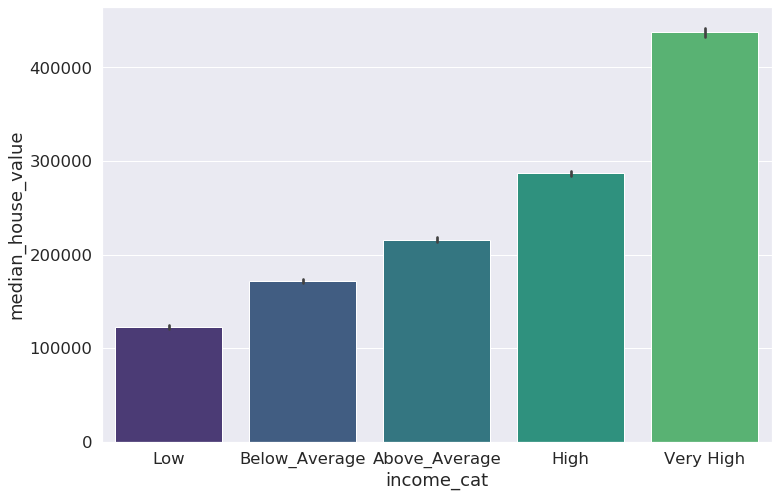

In [8]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.barplot(data = df, 
            x = "income_cat", 
            y = "median_house_value", 
            dodge = True
           )
plt.savefig('results/categorical_incoming.png')
plt.show()

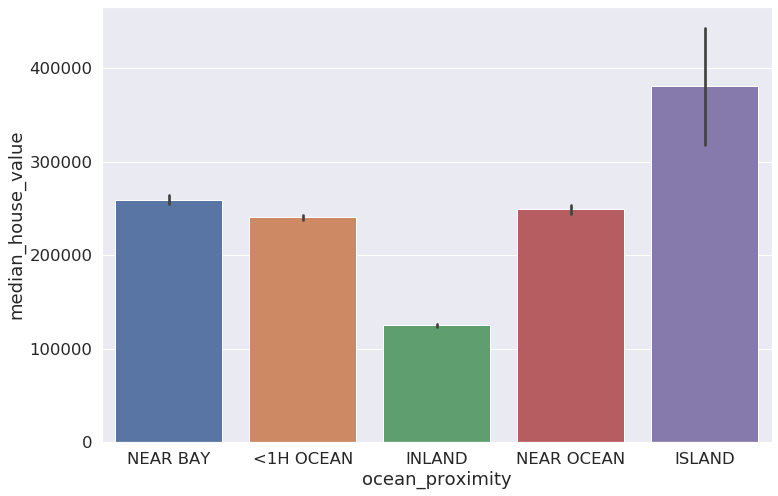

In [9]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value", dodge = True)
plt.savefig('results/categorical_ocean_proximity.png')
plt.show()

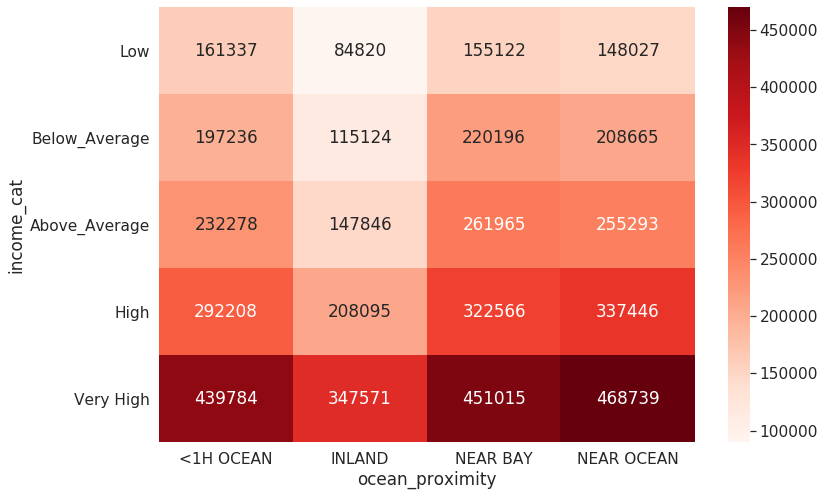

In [10]:
matrix = df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])
matrix.astype("int")
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(matrix.astype("int"), cmap = "Reds", annot = True, fmt = "d", vmin = 90000, vmax = 470000)
plt.savefig('results/prices_x_cat_matrix_incoming_ocean.png')
plt.show()

## Map Plot

<Figure size 1080x720 with 0 Axes>

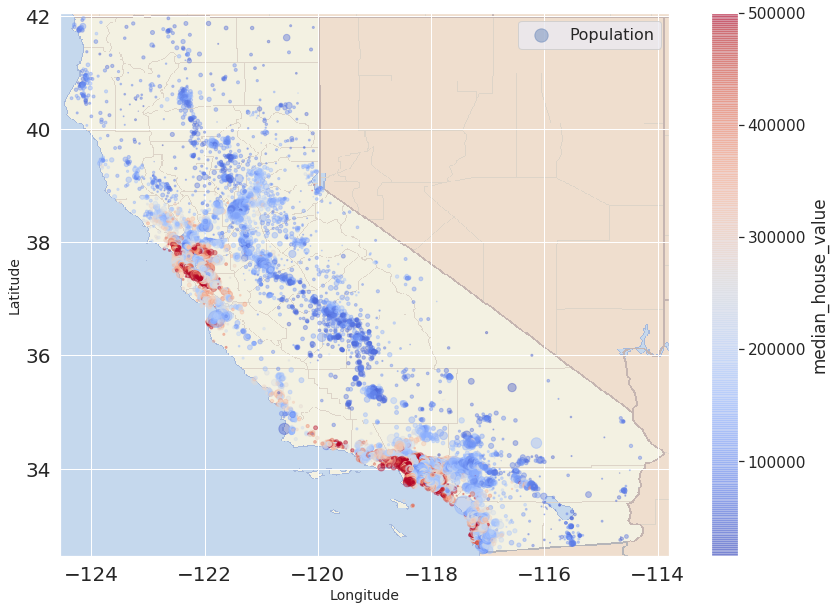

In [11]:
import matplotlib.image as mpimg
california_img = mpimg.imread("data/california.png")

plt.figure(figsize = (15, 10))
#plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])


df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False)
                      
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.savefig('results/prices_california.png')
plt.show()

# Machine Larning Model

In [39]:
import scipy.stats as stats
pd.options.display.float_format = '{:.2f}'.format

label = df['median_house_value'].copy()

# selecting the features
features = df.drop(columns = ["median_house_value"])

# normalizing the float features with z-score
feat1 = features.select_dtypes("float").apply(lambda x: stats.zscore(x))

# "Dummying" ocean_proximity
dummies = pd.get_dummies(features['ocean_proximity'])

# Concatenating the categorical columns to the feature dataframe
features = pd.concat([feat1, dummies, df['income_cat']], axis = 1)

#### Splitting the Data into Train and Test Set

In [56]:
test_size = 0.2
X_target = features.sample(frac = test_size, random_state= 123)
X_train = features.loc[~features.index.isin(X_target.index)].copy()

# shuffling training set
X_train = X_train.sample(frac = 1, random_state= 123)

# 
X_train.drop(columns = ["income_cat"], inplace = True)
X_target.drop(columns = ["income_cat"], inplace = True)

y_train = label.loc[X_train.index]
y_target  = label.loc[X_target.index]

#### Training the ML Model (Random Forest Regressor)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [41]:
# Setting the regressor
forest_reg = RandomForestRegressor(random_state = 42, 
                                   n_estimators = 500,
                                   max_features= "sqrt", 
                                   max_depth= 75, 
                                   min_samples_split=2)

# training
forest_reg.fit(X_train, y_train)

#### Checking the quality of fitting

In [44]:
forest_reg.score(X_train, y_train)

0.975819132775708

In [53]:
pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, pred)
forest_rmse = np.sqrt(forest_mse)
print("House mean price  : ",label.mean())
print("Error on regressor: ",forest_rmse,"(",int(100*forest_rmse/label.mean()),"%)")

House mean price  :  206864.41315519012
Error on regressor:  18034.098012011404 ( 8 %)


#### Evaluating the Model on the Test Set

In [57]:
# Checking score on target
forest_reg.score(X_target, y_target)

0.8232214289508166

In [58]:
pred = forest_reg.predict(X_target)
forest_mse = mean_squared_error(y_target, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

47609.09996967349

In [62]:
comp = pd.DataFrame(data = {"True Value": y_target, "Predicted":pred})
comp

,True Value,Predicted
14354,101800.00,224430.20
12908,213000.00,128157.00
19545,58800.00,69895.20
12188,111300.00,182554.61
14786,174100.00,156341.20
...,...,...
10262,272200.00,296141.80
3614,175900.00,180845.60
19296,215900.00,223104.40
5826,326100.00,319093.41


In [108]:
ae = np.square(comp['True Value']-comp['Predicted']).mean()
np.sqrt(ae)

47609.09996967354

#### Feature Importance

In [109]:
forest_reg.feature_importances_

array([8.08324039e-02, 7.56959501e-02, 4.13588157e-02, 2.32562797e-02,
       2.02231020e-02, 2.33422138e-02, 1.97869753e-02, 2.90366035e-01,
       6.40255118e-02, 9.32563695e-02, 1.00371060e-01, 1.93517054e-02,
       1.34296324e-01, 2.70311833e-04, 5.76791958e-03, 7.79902214e-03])

In [110]:
feature_imp = pd.Series(data = forest_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending = False)

In [111]:
feature_imp

median_income         0.29
INLAND                0.13
pop_per_household     0.10
bedrooms_per_rooms    0.09
longitude             0.08
latitude              0.08
rooms_per_household   0.06
housing_median_age    0.04
population            0.02
total_rooms           0.02
total_bedrooms        0.02
households            0.02
<1H OCEAN             0.02
NEAR OCEAN            0.01
NEAR BAY              0.01
ISLAND                0.00
dtype: float64

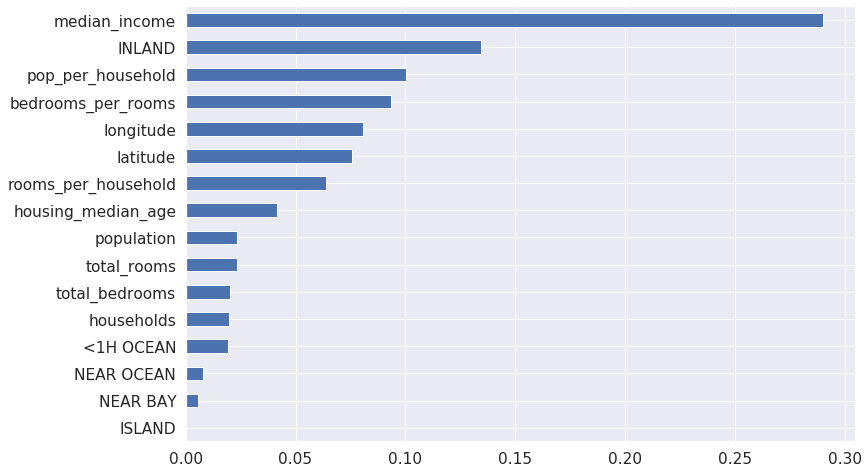

In [112]:
feature_imp.sort_values().plot.barh(figsize = (12, 8))
plt.show()